# Amazon food reviews Prediction

> This Dataset contains 568,455 reviews by customers on products.
> The columns in the table are:
* Id
* ProductId - unique identifier for the product
* UserId - unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of users who indicated whether they found the review helpful
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review

### Load the Dataset

In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect('database.sqlite')

In [2]:
dat = pd.read_sql_query("""SELECT * FROM Reviews""", con)

In [3]:
dat.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
print 'There are %f percentage unique products'% (len(set(dat['ProductId']))/(len(dat['ProductId'])*1.))

There are 0.130632 percentage unique products


In [54]:
print 'There are %f percentage unique customers'% (len(set(dat['UserId']))/(len(dat['UserId'])*1.))

There are 0.450448 percentage unique customers


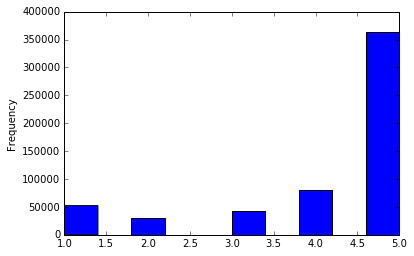

In [55]:
dat['Score'].plot.hist()

#### The plot shows that there are more positive reviews. Lets Split 4,5 as positive and 1,2,3 as negative reviews for our prediction

In [4]:
def labelData(score):
    if score >= 4:
        return 'positive'
    return 'negative'

dat['PScore'] = dat['Score'].map(labelData)

In [5]:
dat[['Score','PScore']].head(5)

,Score,PScore
0,5,positive
1,1,negative
2,4,positive
3,2,negative
4,5,positive


#### we can also combine summary and text.

In [6]:
def combineText(row):
    return row['Summary'] +" "+ row['Text']

dat['reviews'] = dat.apply(combineText,axis=1)

In [7]:
dat[['reviews','PScore']].head(5)

,reviews,PScore
0,Good Quality Dog Food I have bought several of...,positive
1,Not as Advertised Product arrived labeled as J...,negative
2,"""Delight"" says it all This is a confection tha...",positive
3,Cough Medicine If you are looking for the secr...,negative
4,Great taffy Great taffy at a great price. The...,positive


### save dataframe to disk

In [8]:
dat[['reviews','PScore']].to_pickle('amzreviews')

### Read Data back for further processing

In [20]:
dat = pd.read_pickle('amzreviews')

In [21]:
dat.head(5)

,reviews,PScore
0,Good Quality Dog Food I have bought several of...,positive
1,Not as Advertised Product arrived labeled as J...,negative
2,"""Delight"" says it all This is a confection tha...",positive
3,Cough Medicine If you are looking for the secr...,negative
4,Great taffy Great taffy at a great price. The...,positive


## Use nltk to clean the data (we select 10000 rows to avoid memory error)

In [22]:
reviews = dat['reviews'].tolist()[:10000]

In [23]:
reviews[:2]

[u'Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 u'Not as Advertised Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".']

In [24]:
len(reviews)

10000

### Tokenize words

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
tokenized_reviews = []

for doc in reviews:
    tokenized_reviews.append(word_tokenize(doc))
    if len(tokenized_reviews) % 10000 == 0:
        print len(tokenized_reviews)

10000


In [29]:
tokenized_reviews[:3]

[[u'Good',
  u'Quality',
  u'Dog',
  u'Food',
  u'I',
  u'have',
  u'bought',
  u'several',
  u'of',
  u'the',
  u'Vitality',
  u'canned',
  u'dog',
  u'food',
  u'products',
  u'and',
  u'have',
  u'found',
  u'them',
  u'all',
  u'to',
  u'be',
  u'of',
  u'good',
  u'quality',
  u'.',
  u'The',
  u'product',
  u'looks',
  u'more',
  u'like',
  u'a',
  u'stew',
  u'than',
  u'a',
  u'processed',
  u'meat',
  u'and',
  u'it',
  u'smells',
  u'better',
  u'.',
  u'My',
  u'Labrador',
  u'is',
  u'finicky',
  u'and',
  u'she',
  u'appreciates',
  u'this',
  u'product',
  u'better',
  u'than',
  u'most',
  u'.'],
 [u'Not',
  u'as',
  u'Advertised',
  u'Product',
  u'arrived',
  u'labeled',
  u'as',
  u'Jumbo',
  u'Salted',
  u'Peanuts',
  u'...',
  u'the',
  u'peanuts',
  u'were',
  u'actually',
  u'small',
  u'sized',
  u'unsalted',
  u'.',
  u'Not',
  u'sure',
  u'if',
  u'this',
  u'was',
  u'an',
  u'error',
  u'or',
  u'if',
  u'the',
  u'vendor',
  u'intended',
  u'to',
  u'represe

### Removing punctuation

In [30]:
import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [31]:
tokenized_reviews_no_punctuation = []

for review in tokenized_reviews:
    
    new_review = []
    for token in review: 
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_reviews_no_punctuation.append(new_review)
    
print tokenized_reviews_no_punctuation[:3]

[[u'Good', u'Quality', u'Dog', u'Food', u'I', u'have', u'bought', u'several', u'of', u'the', u'Vitality', u'canned', u'dog', u'food', u'products', u'and', u'have', u'found', u'them', u'all', u'to', u'be', u'of', u'good', u'quality', u'The', u'product', u'looks', u'more', u'like', u'a', u'stew', u'than', u'a', u'processed', u'meat', u'and', u'it', u'smells', u'better', u'My', u'Labrador', u'is', u'finicky', u'and', u'she', u'appreciates', u'this', u'product', u'better', u'than', u'most'], [u'Not', u'as', u'Advertised', u'Product', u'arrived', u'labeled', u'as', u'Jumbo', u'Salted', u'Peanuts', u'the', u'peanuts', u'were', u'actually', u'small', u'sized', u'unsalted', u'Not', u'sure', u'if', u'this', u'was', u'an', u'error', u'or', u'if', u'the', u'vendor', u'intended', u'to', u'represent', u'the', u'product', u'as', u'Jumbo'], [u'Delight', u'says', u'it', u'all', u'This', u'is', u'a', u'confection', u'that', u'has', u'been', u'around', u'a', u'few', u'centuries', u'It', u'is', u'a', u'l

In [33]:
print len(tokenized_reviews_no_punctuation)

10000


### Cleaning text of stopwords

In [19]:
from nltk.corpus import stopwords

tokenized_reviews_no_stopwords = []
for doc in tokenized_reviews_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    tokenized_reviews_no_stopwords.append(new_term_vector)
            
print tokenized_reviews_no_stopwords[:4]

[[u'Good', u'Quality', u'Dog', u'Food', u'I', u'bought', u'several', u'Vitality', u'canned', u'dog', u'food', u'products', u'found', u'good', u'quality', u'The', u'product', u'looks', u'like', u'stew', u'processed', u'meat', u'smells', u'better', u'My', u'Labrador', u'finicky', u'appreciates', u'product', u'better'], [u'Not', u'Advertised', u'Product', u'arrived', u'labeled', u'Jumbo', u'Salted', u'Peanuts', u'peanuts', u'actually', u'small', u'sized', u'unsalted', u'Not', u'sure', u'error', u'vendor', u'intended', u'represent', u'product', u'Jumbo'], [u'Delight', u'says', u'This', u'confection', u'around', u'centuries', u'It', u'light', u'pillowy', u'citrus', u'gelatin', u'nuts', u'case', u'Filberts', u'And', u'cut', u'tiny', u'squares', u'liberally', u'coated', u'powdered', u'sugar', u'And', u'tiny', u'mouthful', u'heaven', u'Not', u'chewy', u'flavorful', u'I', u'highly', u'recommend', u'yummy', u'treat', u'If', u'familiar', u'story', u'CS', u'Lewis', u'The', u'Lion', u'The', u'Witch

In [20]:
len(tokenized_reviews_no_stopwords)

10000

### Stemming and Lemmatizing

In [34]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
preprocessed_docs = []
for doc in tokenized_reviews_no_punctuation:
#for doc in tokenized_reviews_no_stopwords:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
    preprocessed_docs.append(final_doc)

print preprocessed_docs[:4]

[[u'Good', u'Qualiti', u'Dog', u'Food', u'I', u'have', u'bought', u'sever', u'of', u'the', u'Vital', u'can', u'dog', u'food', u'product', u'and', u'have', u'found', u'them', u'all', u'to', u'be', u'of', u'good', u'qualiti', u'The', u'product', u'look', u'more', u'like', u'a', u'stew', u'than', u'a', u'process', u'meat', u'and', u'it', u'smell', u'better', u'My', u'Labrador', u'is', u'finicki', u'and', u'she', u'appreci', u'thi', u'product', u'better', u'than', u'most'], [u'Not', u'as', u'Advertis', u'Product', u'arriv', u'label', u'as', u'Jumbo', u'Salt', u'Peanut', u'the', u'peanut', u'were', u'actual', u'small', u'size', u'unsalt', u'Not', u'sure', u'if', u'thi', u'wa', u'an', u'error', u'or', u'if', u'the', u'vendor', u'intend', u'to', u'repres', u'the', u'product', u'as', u'Jumbo'], [u'Delight', u'say', u'it', u'all', u'Thi', u'is', u'a', u'confect', u'that', u'ha', u'been', u'around', u'a', u'few', u'centuri', u'It', u'is', u'a', u'light', u'pillowi', u'citru', u'gelatin', u'with'

In [35]:
# to reduce memory
del tokenized_reviews
del tokenized_reviews_no_punctuation
#del tokenized_reviews_no_stopwords

In [36]:
len(preprocessed_docs)

10000

In [37]:
final_reviews = []
for doc in preprocessed_docs:
    final_reviews.append((" ".join(doc)).lower())
print final_reviews[:2]

[u'good qualiti dog food i have bought sever of the vital can dog food product and have found them all to be of good qualiti the product look more like a stew than a process meat and it smell better my labrador is finicki and she appreci thi product better than most', u'not as advertis product arriv label as jumbo salt peanut the peanut were actual small size unsalt not sure if thi wa an error or if the vendor intend to repres the product as jumbo']


In [38]:
print len(final_reviews)

10000


In [39]:
scores = dat['PScore'].tolist()[:10000]

In [40]:
len(scores)

10000

In [41]:
from collections import Counter
Counter(scores)

Counter({'negative': 2384, 'positive': 7616})

### convert in to dataframe and save it

In [42]:
dat = pd.DataFrame({'reviews':final_reviews,'scores':scores})

In [43]:
dat.head(5)

,reviews,scores
0,good qualiti dog food i have bought sever of t...,positive
1,not as advertis product arriv label as jumbo s...,negative
2,delight say it all thi is a confect that ha be...,positive
3,cough medicin if you are look for the secret i...,negative
4,great taffi great taffi at a great price there...,positive


In [44]:
dat.to_pickle('reviewsAndscores')

In [45]:
dat = pd.read_pickle('reviewsAndscores')

In [46]:
dat.head(5)

,reviews,scores
0,good qualiti dog food i have bought sever of t...,positive
1,not as advertis product arriv label as jumbo s...,negative
2,delight say it all thi is a confect that ha be...,positive
3,cough medicin if you are look for the secret i...,negative
4,great taffi great taffi at a great price there...,positive


## Lets do some prediction

> For our prediction we do logistic regression and naive bayes classifier

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(dat['reviews'])           
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)

### split in to Train and Test set

In [49]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_tfidf, dat['scores'], test_size=0.2, random_state=21)

### Fit Logistic regression 

In [50]:
from sklearn import linear_model
prediction = dict()
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)
prediction['Logistic'] = logreg.predict(X_test)

### Fit Multinomial Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, Y_train)
prediction['Multinomial'] = model.predict(X_test)

### Bernoulli Naive Bayes 

In [52]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train, Y_train)
prediction['Bernoulli'] = model.predict(X_test)

### Metrics

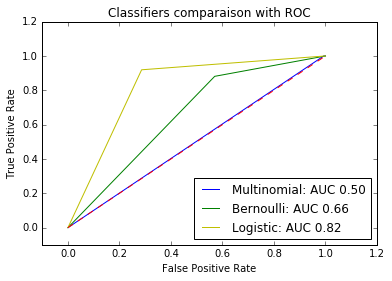

In [53]:
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

def format(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(format)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(format), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
print(metrics.classification_report(Y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.72      0.71      0.72       451
   negative       0.92      0.92      0.92      1549

avg / total       0.87      0.87      0.87      2000



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(Y_test, prediction['Logistic'])

array([[ 322,  129],
       [ 125, 1424]])

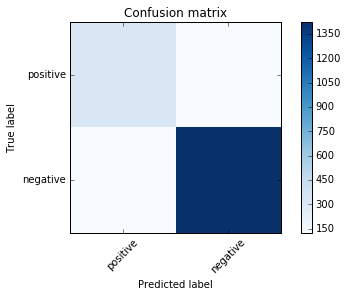

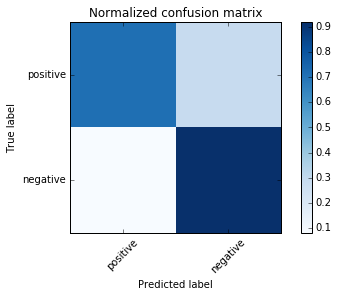

In [58]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(scores)))
    plt.xticks(tick_marks, set(scores), rotation=45)
    plt.yticks(tick_marks, set(scores))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

### References

https://www.kaggle.com/snap/amazon-fine-food-reviews


http://stanford.edu/~rjweiss/public_html/IRiSS2013/text2/notebooks/cleaningtext.html
